In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
# Assuming you've loaded your data into a DataFrame
# data = pd.read_csv('/home/alan-xie/Desktop/wifi_localization/data/csv/still/still.csv')  # Adjust this to your file
data = pd.read_csv('/home/alan-xie/Documents/Thesis/wifi_localization/data/csv/still/still.csv')

In [24]:
# data.drop('rssi', axis=1, inplace=True)
# data.drop('rssi1', axis=1, inplace=True)
# data.drop('rssi2', axis=1, inplace=True)
# data.drop('rssi3', axis=1, inplace=True)
data.drop(columns=['coord1', 'coord2'], axis=1, inplace=True)

features = ['rssi', 'rssi1', 'rssi2', 'subcarriers', 'ant1_amplitude', 'ant2_amplitude', 
            'ant1_phase', 'ant2_phase']
features = data.columns
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [25]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


PCA with 1 components, sum is 0.4121608089138585.
PCA with 2 components, sum is 0.5026862033398102.
PCA with 3 components, sum is 0.5639601695714305.
PCA with 4 components, sum is 0.6224068671168601.
PCA with 5 components, sum is 0.6792014422422445.
PCA with 6 components, sum is 0.7347482266019113.
PCA with 7 components, sum is 0.7902723257602985.
PCA with 8 components, sum is 0.845444833384884.
PCA with 9 components, sum is 0.8955181192670213.


In [26]:
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['coord1'])  # Color by one of your features
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of CSI Data')
# plt.show()

In [27]:
# Get the PCA loadings
loadings = pca.components_

# Create a DataFrame to better view them
loading_df = pd.DataFrame(loadings, columns=features)

print(loading_df)


   timestamps   csi_len   channel  err_info   noise_floor      rate  \
0   -0.019892  0.363203 -0.000467 -0.009760 -0.000000e+00  0.329154   
1   -0.023735 -0.050692 -0.004361  0.011661 -0.000000e+00 -0.069629   
2   -0.016346 -0.000284  0.011277 -0.011619  1.062518e-17 -0.002277   
3    0.759688 -0.032073  0.052559  0.034408 -0.000000e+00  0.042309   
4    0.239835 -0.023497  0.032637  0.007325  2.081668e-17 -0.012454   
5   -0.043396  0.003650  0.965221 -0.246134 -3.417405e-16 -0.001177   
6   -0.036383 -0.000202  0.251706  0.955855 -1.535230e-16  0.000395   
7    0.136372 -0.027965  0.031702 -0.152692 -1.006140e-16 -0.013592   
8   -0.571643 -0.066048  0.002068 -0.028131 -0.000000e+00  0.042399   

      bandWidth     num_tones            nr        nc  ...  payload_length  \
0  2.117582e-22  6.617445e-24 -0.000000e+00  0.363203  ...        0.031667   
1 -0.000000e+00  8.673617e-19  2.168404e-19 -0.050692  ...        0.771074   
2  2.775558e-17 -1.387779e-17 -1.665335e-16 -0.000284  

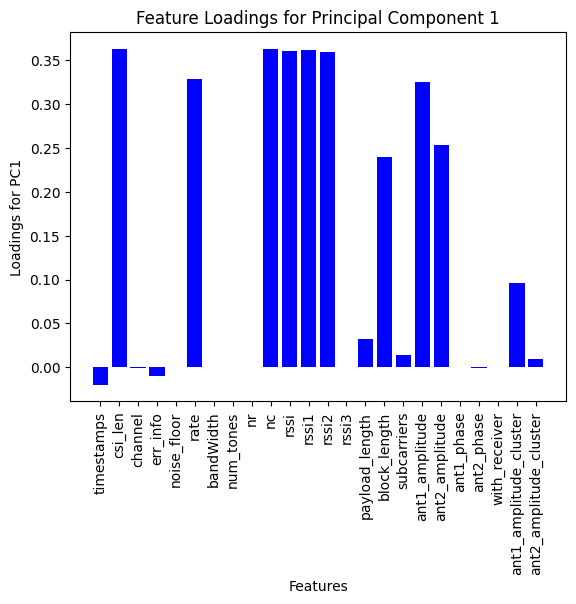

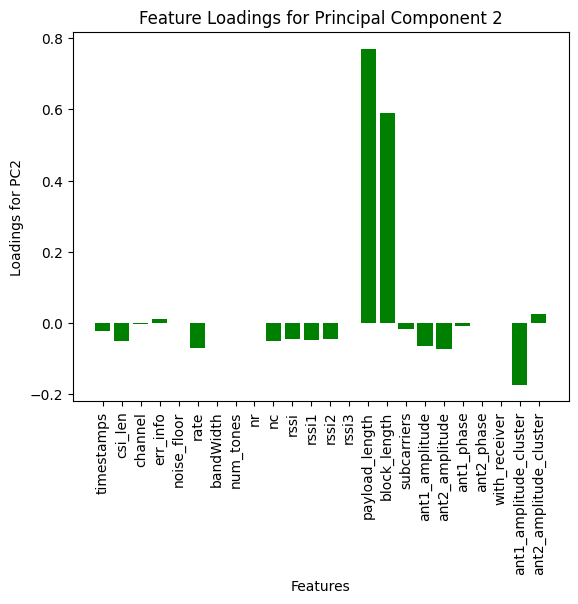

In [28]:
plt.bar(features, loadings[0], color='b')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Loadings for PC1')
plt.title('Feature Loadings for Principal Component 1')
plt.show()

plt.bar(features, loadings[1], color='g')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Loadings for PC2')
plt.title('Feature Loadings for Principal Component 2')
plt.show()


In [29]:
import numpy as np

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative explained variance: {cumulative_variance}')


Cumulative explained variance: [0.41216081 0.5026862  0.56396017 0.62240687 0.67920144 0.73474823
 0.79027233 0.84544483 0.89551812]


In [30]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_scaled)

# Check the explained variance ratio for the chosen components
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'SUM: {sum(explained_variance)}')


Explained variance by each component: [0.41216081 0.09052539 0.06127397 0.0584467  0.05679458 0.05554678
 0.0555241  0.05517251 0.05007329 0.04983403]
SUM: 0.9453521519280513


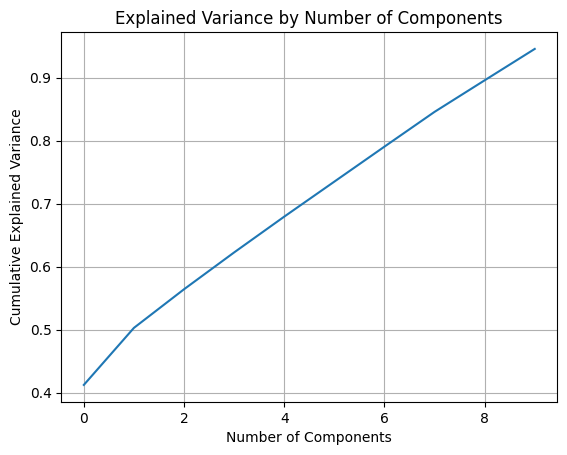

In [31]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()


In [32]:
# Remove exact duplicates
df = pd.DataFrame(X_reduced)
X_reduced_deduped = df.drop_duplicates()
